# Sentiment Classification & How To "Frame Problems" for a Neural Network

# This project is performed in a progressive manner. First a simple approach is tried and then changes are made to improve the performance. 

## Checking out the dataset:

In [3]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [4]:
len(reviews)

25000

In [5]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [6]:
len(labels)

25000

In [7]:
labels[0]

'POSITIVE'

## Developing a Prective Theory

In [8]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


#### Neural Networks are used to transform the input into useful output, like transforming medical scans into cancer diagnoses, or transforming radar data into steering decisions for a self-driving car. These complex transformations tend to come from a series of simpler transformations, organized into layers. The more transformations, the more complex the relationship between input and output. Deep learning refers to networks of transformations with lots of layers, called a deep network. 

#### The one of the most obvious predictive theory by looking at the data is that the outcome is co-related with the words used in the reviews. I first validated whether these words have the predictive power for predicting the sentiment.


## Quick Theory Validation

In [9]:
from collections import Counter
import numpy as np

In [10]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [11]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [12]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [13]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

In [14]:
list(reversed(negative_counts.most_common()))

[('whelk', 1),
 ('pressurized', 1),
 ('ungar', 1),
 ('bellwood', 1),
 ('oldsters', 1),
 ('submerging', 1),
 ('mwuhahahaa', 1),
 ('leopards', 1),
 ('insulation', 1),
 ('hoodies', 1),
 ('firearm', 1),
 ('yaks', 1),
 ('feasts', 1),
 ('deamon', 1),
 ('ziller', 1),
 ('lagomorph', 1),
 ('marinaro', 1),
 ('accelerant', 1),
 ('vegan', 1),
 ('yez', 1),
 ('superhu', 1),
 ('fastidiously', 1),
 ('spotlessly', 1),
 ('dahlink', 1),
 ('rebanished', 1),
 ('unmated', 1),
 ('wushu', 1),
 ('coldness', 1),
 ('wishmaster', 1),
 ('waddling', 1),
 ('nix', 1),
 ('echance', 1),
 ('vannet', 1),
 ('hodet', 1),
 ('francie', 1),
 ('vivisects', 1),
 ('crackles', 1),
 ('degeneration', 1),
 ('outsmarts', 1),
 ('lowlight', 1),
 ('slackly', 1),
 ('unrurly', 1),
 ('rudest', 1),
 ('brattiest', 1),
 ('shamefacedly', 1),
 ('vandalism', 1),
 ('hirsh', 1),
 ('unfocussed', 1),
 ('athmosphere', 1),
 ('difranco', 1),
 ('ani', 1),
 ('brubaker', 1),
 ('shuttlecock', 1),
 ('badminton', 1),
 ('vernois', 1),
 ('odile', 1),
 ('triomp

## Here are few Observations :
#### 1) Some words are frequently used in both sentiments "Positive" and "Negative" like 'the', 'a' , 'of' , 'to' etc. We can infer that these words do not have much predictive power as they are highly used in both.  For finding out such words we can find out the polarity(ratio of their counts in positive to counts in negative) of each word as will be shown below.
#### 2) Some words are very infrequent like whelk, pressurized, ungar etc. We can say that since these words are used very less number of times, it will not be justified to say determinitically that this word is used for positive or negative sentiments. We can simply find such words by using a threshold for min_count of words. Words having frequency less than this threshold have very less predictive power.

#### I will use these obesrvations later for improving the speed of training and increasing accuracy of the neural network.

### By just obseving the counts it is very difficult to determine which words have the predictive power. One method for doing so is by finding out the polarity of each word as seen below:

#### Ratio = positve_counts[word]/ negative_counts[word]  and Polarity = log(Ratio) if Ratio > 1 else log(1/Ration)

In [15]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100): # we can increase this count to remove the less frequenty used words
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [16]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [17]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

## Now we can easily see which words have high predictive power and which don't have. 
## We can also use plots to verify our theory as shown below:

In [18]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [19]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

### In the above plot => We have on the x-axis the polarity of words and on the y-axis is normalized frequency of words with particular polarity. As we move either left or right of the 0, the predictive power of words increases but number of such words decreases. We can use this to reduce the vocabulary size of our reviews which will help us increase the speed of the training. We will see more on this later ! 

In [20]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [21]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

### On the x-axis is the frequency of the word whereas on the y-axis is no of words with a particular frequency. From the above distribution it can be seen that there are many words with very low frequency and thus very less predictive power. We can remove these words from the vocabulary to reduce the vocabulary size and thus increase the speed of training. We will see more on this later !

# Step-1: First the input and output were created for the Neural Network.
# Transforming Text To Numbers

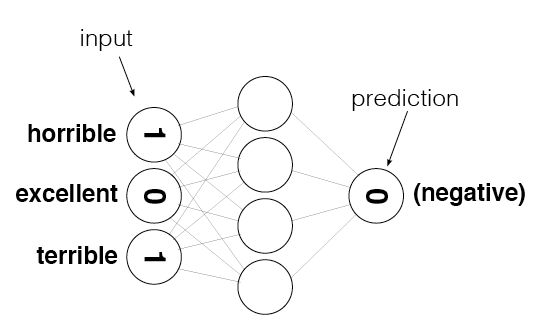

In [22]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

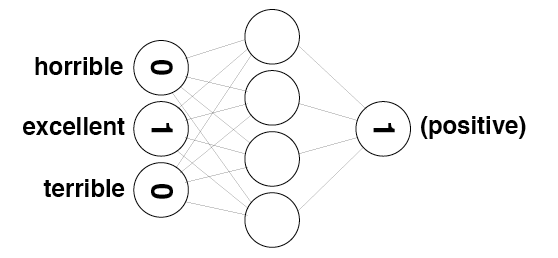

In [23]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# First approach is to feed the network with the frequecy of each word in the review. 

## Creating the input layer


In [24]:
import numpy as np
vocab = total_counts.keys()
vocab_size = len(list(total_counts.keys()))

In [25]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'bromwell': 0,
 'high': 1,
 'is': 2,
 'a': 3,
 'cartoon': 4,
 'comedy': 5,
 '.': 6,
 'it': 7,
 'ran': 8,
 'at': 9,
 'the': 10,
 'same': 11,
 'time': 12,
 'as': 13,
 'some': 14,
 'other': 15,
 'programs': 16,
 'about': 17,
 'school': 18,
 'life': 19,
 '': 20,
 'such': 21,
 'teachers': 22,
 'my': 23,
 'years': 24,
 'in': 25,
 'teaching': 26,
 'profession': 27,
 'lead': 28,
 'me': 29,
 'to': 30,
 'believe': 31,
 'that': 32,
 's': 33,
 'satire': 34,
 'much': 35,
 'closer': 36,
 'reality': 37,
 'than': 38,
 'scramble': 39,
 'survive': 40,
 'financially': 41,
 'insightful': 42,
 'students': 43,
 'who': 44,
 'can': 45,
 'see': 46,
 'right': 47,
 'through': 48,
 'their': 49,
 'pathetic': 50,
 'pomp': 51,
 'pettiness': 52,
 'of': 53,
 'whole': 54,
 'situation': 55,
 'all': 56,
 'remind': 57,
 'schools': 58,
 'i': 59,
 'knew': 60,
 'and': 61,
 'when': 62,
 'saw': 63,
 'episode': 64,
 'which': 65,
 'student': 66,
 'repeatedly': 67,
 'tried': 68,
 'burn': 69,
 'down': 70,
 'immediately': 71,
 're

In [26]:
vocab_size


74074

## Input Layer is of size 74074 which is very large. We will reduce its size later 

### Function for creating the input layer

In [27]:
layer_0 = np.zeros((1,vocab_size))
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

In [28]:
update_input_layer(reviews[0])
layer_0

array([[ 4.,  5.,  4., ...,  0.,  0.,  0.]])

## Creating the output layer

In [45]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [46]:
get_target_for_label(labels[0])

1

# Building the Neural Network
# These fuctions are incorporated in the neural network class as follows:

- 3 layer neural network
- no non-linearity in hidden layer (Why we want non-linearity in the hidden layer of neural network ?)
- used above functions to create the training data
- created a "pre_process_data" function to create vocabulary for the training data generating functions

In [47]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [48]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [49]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):401.8% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [50]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):75.22 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):76.10 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):76.68 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):75.86 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:44.0% Speed(reviews/sec):75.61 #Correct:5286 #Trained:10573 Training Accuracy:49.9%

KeyboardInterrupt: 

## We observed the acccuracy of approximately 50%. Let's try to improve the accuracy by reducing the learning rate !

In [51]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [52]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):75.71 #Correct:1247 #Trained:2501 Training Accuracy:49.8%
Progress:20.8% Speed(reviews/sec):75.52 #Correct:2497 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):73.83 #Correct:3747 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):73.89 #Correct:4997 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):73.65 #Correct:6247 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):73.19 #Correct:7491 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):73.30 #Correct:8741 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):72.37 #Correct:9991 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):72.85 #Correct:11241 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):73.15 #Correct:11990 #Trained:24000 Training Accu

## Not much improvement! What now ?? Let us further decrease the learning to see if we can increase our accuracy ! 

In [55]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [56]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):78.87 #Correct:1276 #Trained:2501 Training Accuracy:51.0%
Progress:20.8% Speed(reviews/sec):78.71 #Correct:2648 #Trained:5001 Training Accuracy:52.9%
Progress:31.2% Speed(reviews/sec):78.70 #Correct:4078 #Trained:7501 Training Accuracy:54.3%
Progress:41.6% Speed(reviews/sec):78.05 #Correct:5619 #Trained:10001 Training Accuracy:56.1%
Progress:52.0% Speed(reviews/sec):78.25 #Correct:7211 #Trained:12501 Training Accuracy:57.6%
Progress:62.5% Speed(reviews/sec):78.49 #Correct:8821 #Trained:15001 Training Accuracy:58.8%
Progress:72.9% Speed(reviews/sec):78.47 #Correct:10409 #Trained:17501 Training Accuracy:59.4%
Progress:83.3% Speed(reviews/sec):78.21 #Correct:12126 #Trained:20001 Training Accuracy:60.6%
Progress:93.7% Speed(reviews/sec):78.14 #Correct:13832 #Trained:22501 Training Accuracy:61.4%
Progress:99.9% Speed(reviews/sec):78.09 #Correct:14908 #Trained:24000 Training Ac

# Huh ! Why so low accuracy ? 
## One of the reason for this is noise. 
## Understanding Neural Noise :

In [47]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[643])

In [48]:
layer_0

array([[  0.,   0.,  15., ...,   0.,   0.,   0.]])

In [49]:
review_counter = Counter();

In [53]:
for word in reviews[643].split():
    review_counter[word]+=1
review_counter.most_common()

[('.', 132),
 ('the', 92),
 ('to', 72),
 ('is', 60),
 ('of', 56),
 ('in', 52),
 ('it', 52),
 ('i', 48),
 ('br', 48),
 ('and', 48),
 ('a', 44),
 ('but', 40),
 ('as', 36),
 ('timberlake', 36),
 ('s', 32),
 ('like', 32),
 ('not', 32),
 ('t', 24),
 ('with', 24),
 ('for', 24),
 ('edison', 20),
 ('role', 16),
 ('or', 16),
 ('simply', 16),
 ('he', 16),
 ('his', 16),
 ('an', 16),
 ('some', 16),
 ('this', 16),
 ('don', 12),
 ('screen', 12),
 ('him', 12),
 ('play', 12),
 ('any', 12),
 ('which', 12),
 ('from', 12),
 ('you', 12),
 ('do', 12),
 ('will', 12),
 ('j', 12),
 ('one', 12),
 ('feels', 12),
 ('through', 12),
 ('music', 12),
 ('time', 8),
 ('justin', 8),
 ('got', 8),
 ('so', 8),
 ('emotional', 8),
 ('casting', 8),
 ('that', 8),
 ('almost', 8),
 ('bad', 8),
 ('have', 8),
 ('affleck', 8),
 ('acting', 8),
 ('read', 8),
 ('expressions', 8),
 ('clich', 8),
 ('actors', 8),
 ('how', 8),
 ('however', 8),
 ('alone', 8),
 ('david', 8),
 ('burke', 8),
 ('also', 8),
 ('freeman', 8),
 ('spacey', 8),
 ('

## Broadly speaking, Each layer neural network takes the weighted sum of the inputs to produce the inputs for the next layer. The grater the input the greater is its influence on the output assuming same weights for all the inputs. Here our input is the count of each word in the review. So greater is its count higher is its influence on the output. This is the noise. How ??
## Observe the most common word from the above example it is '.' and it's count is 132. So it is influencing the output the most which is meaningless. This is noise.  

# Reducing Noise in the Input Data 
## To reduce the noise, instead of using the count we can instead replace the count with 1 if the word is present in the review and 0 if the word is not present in the review. This will ensure that each word is given the equal weightage initially. Noise will be reduced further more but first let us try this ! Just wait and watch !

In [54]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [55]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [56]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):73.85 #Correct:1810 #Trained:2501 Training Accuracy:72.3%
Progress:20.8% Speed(reviews/sec):77.01 #Correct:3786 #Trained:5001 Training Accuracy:75.7%
Progress:31.2% Speed(reviews/sec):76.75 #Correct:5896 #Trained:7501 Training Accuracy:78.6%
Progress:41.6% Speed(reviews/sec):77.84 #Correct:8023 #Trained:10001 Training Accuracy:80.2%
Progress:52.0% Speed(reviews/sec):77.65 #Correct:10140 #Trained:12501 Training Accuracy:81.1%
Progress:62.5% Speed(reviews/sec):76.77 #Correct:12265 #Trained:15001 Training Accuracy:81.7%
Progress:72.9% Speed(reviews/sec):76.95 #Correct:14398 #Trained:17501 Training Accuracy:82.2%
Progress:83.3% Speed(reviews/sec):76.64 #Correct:16581 #Trained:20001 Training Accuracy:82.9%
Progress:93.7% Speed(reviews/sec):76.35 #Correct:18770 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):76.56 #Correct:20093 #Trained:24000 Training 

In [57]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):515.6% #Correct:858 #Tested:1000 Testing Accuracy:85.8%

# WOW ! The achieved a accuracy of 85% from 62% ! That's great ! 
# The noise can further be reduced more, but before that Let us improve the speed that will help us reduce the training time and our idle time will be reduced :P 

Let me show you by example how we can increase the speed:

In [62]:
layer_0 = np.zeros(10)
layer_0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [63]:
layer_0[4] = 1
layer_0[9] = 1

In [64]:
layer_0

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.])

In [65]:
weights_0_1 = np.random.randn(10,5)

In [66]:
layer_0.dot(weights_0_1)

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

In the above example, I just created the input for the layer_-1 of neural network. For that I multiplied an array of size 1x10 with a array of size 10x5, to get a output of size 1x5. Simple right ? But the thing to notice here is that are input consists of only 0 and 1 and hence products of the weights with input will be non-zero only for input which is non-zero. Hence we don't need to multiply by 0. Note the weights are multiplied by 1 and hence they can be simply added to get the output ! See the below image for better understanding; 

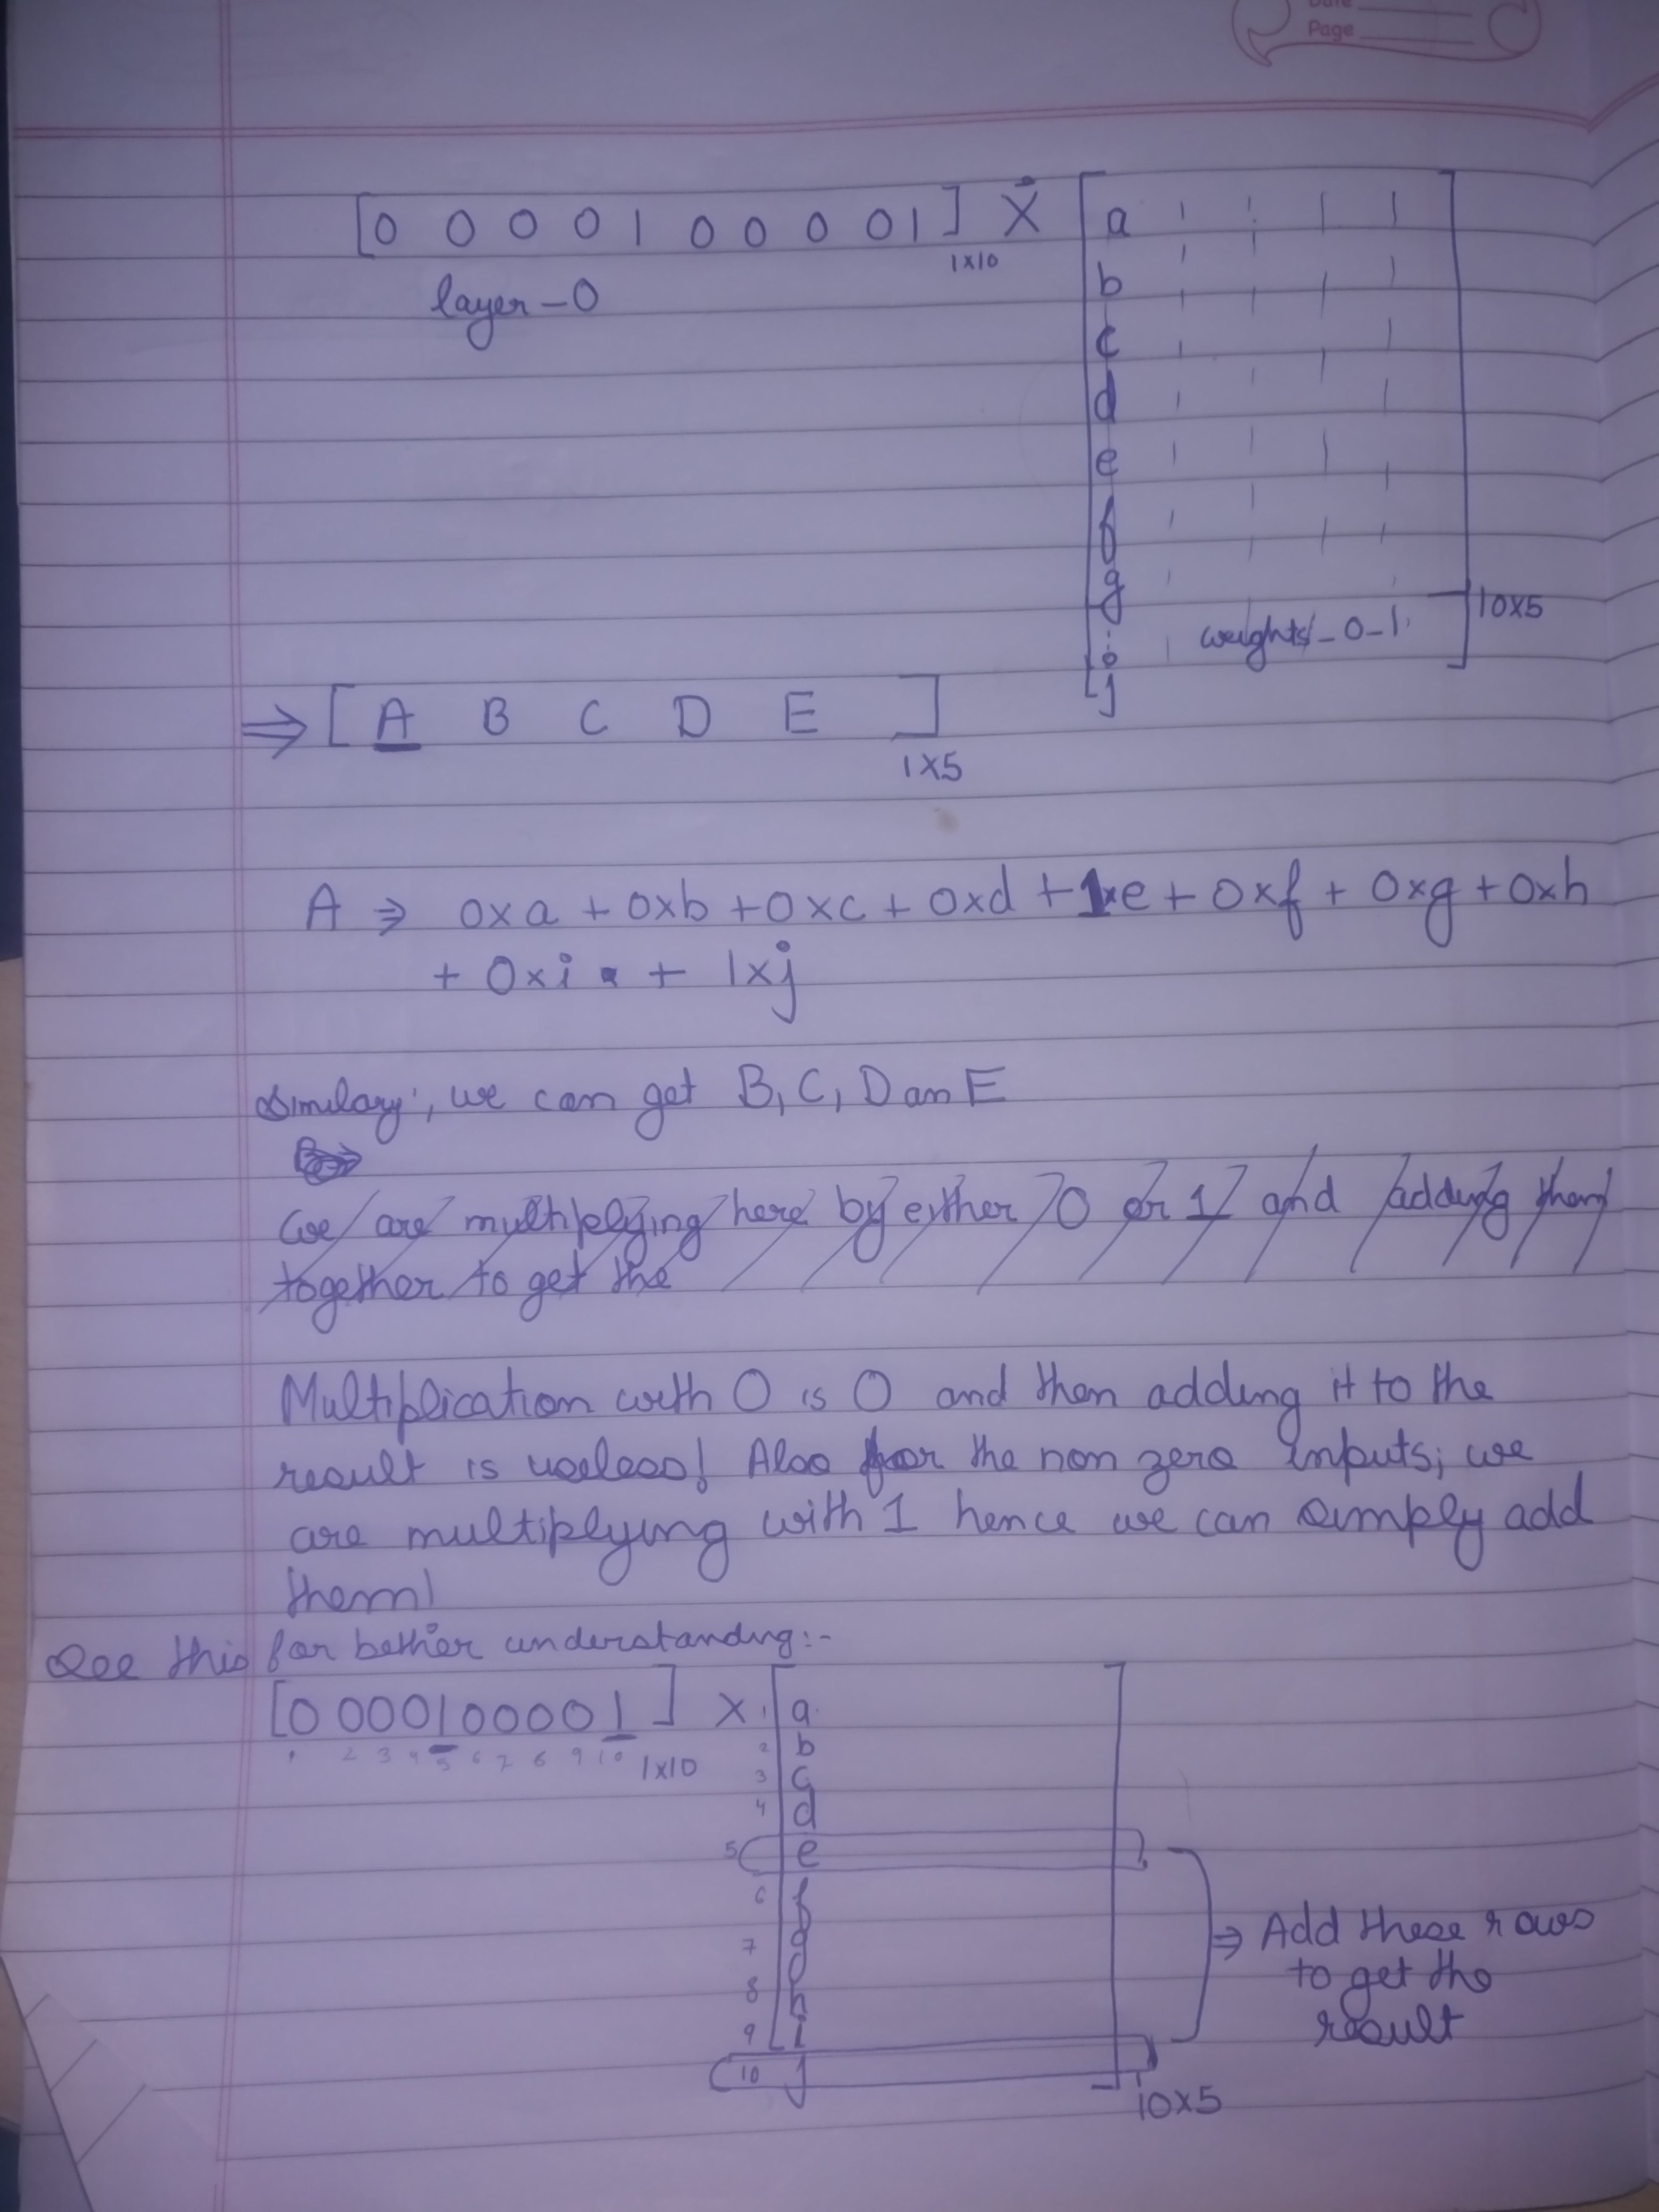

In [68]:
from IPython.display import Image
Image(filename='DipankerNotes.jpg')

Now this will help us reduce the number of multiplication operations in general making the calcution more effecient ! We can implement the same using the code below: 

In [69]:
indices = [4,9]

In [70]:
layer_1 = np.zeros(5)

In [71]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [73]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

See the answer is same ! I would suggest to try it on paper for better understanding !

# Making the Network more effecient ! 

In [74]:
import time
import sys

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
#             layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [75]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [76]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1090. #Correct:20077 #Trained:24000 Training Accuracy:83.6%

In [77]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1563.% #Correct:852 #Tested:1000 Testing Accuracy:85.2%

# Wow  ! The speed increased from 70 reviews per second to nearly 1000 reviews per second ! Nice :)

# Let us further decrease the Noise ! 
#### This will help us increase in our speed as the input vector wil be small and may be little increse in the accuracy !
###### we can do this by strategically reducing the size of the vocabulary ! As I discussed above that some words have very low predictive power and hence those are useless. Such words fall into two categories:
1) Words which have very low frequency 

2) words which are highly used in both positive and negative sentiments

In [84]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews, polarity_cutoff, min_count)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews, polarity_cutoff,min_count):
        
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
#             layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            if(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start + 0.001)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start + 0.001)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [85]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)

In [86]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1301. #Correct:20461 #Trained:24000 Training Accuracy:85.2%

In [87]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1952.% #Correct:859 #Tested:1000 Testing Accuracy:85.9%

Not much increase in the speed as the size of the vocabulary is not reduced much ! 
Now see below if we increase the polarity cutt off : 

In [88]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)

In [89]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):4221. #Correct:20552 #Trained:24000 Training Accuracy:85.6%

In [90]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):3922.% #Correct:822 #Tested:1000 Testing Accuracy:82.2%

# Wow the speed increased from 1000 to 4000 ! Cheers ! But the accuracy reduced by only 3%. We can bear that ! 


#### let us give last try to improve our accuracy more ! 
#### What can we try ? Now since we have reduced the size of our vocabulary, we have words with high predictive power in the vocabulary so what if we again use count as input since it will better represent our review !

In [130]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews, polarity_cutoff, min_count)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews, polarity_cutoff,min_count):
        
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word.lower())
                    else:
                        review_vocab.add(word.lower())
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if word in self.word2index.keys():
                self.layer_0[0][self.word2index[word]] += 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            #review = training_reviews[i]
            label = training_labels[i]
            review = training_reviews_raw[i]
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review.lower());
            #Hidden layer
            self.layer_1 = self.layer_0.dot(self.weights_0_1)
            #self.layer_1 *= 0
            #for index in review:
                #self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            self.layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = self.layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(self.layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate
            
            #for index in review:
                #self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(self.layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            if(self.layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start + 0.001)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start + 0.001)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower());

        # Hidden layer
        self.layer_1 *= 0
        self.layer_1 = self.layer_0.dot(self.weights_0_1)
        #unique_indices = set()
        #for word in review.lower().split(" "):
            #if word in self.word2index.keys():
                #unique_indices.add(self.word2index[word])
        #for index in unique_indices:
            #self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [149]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.5,learning_rate=0.01)

In [152]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):987.3 #Correct:21782 #Trained:24000 Training Accuracy:90.7%

In [154]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1470.% #Correct:832 #Tested:1000 Testing Accuracy:83.2%

In [159]:
review_dipanker = "the movie was bad ! Ending was not good ! I hated it !but still waiting for the awesome sequel !"
mlp.run(review_dipanker)

'POSITIVE'

# So this was a fail, Speed got reduced and also the accuracy didn't improve ! Don't try this at home ! :P

# Some questions need to be answered !!
## 1) Why non-linearity was removed from the hidden layer ? 
### Ans: The weights of the last layer are acting as a feature detector. Hidden layer ke output ka mujhe weighted sum lena h aur uska sigmoid leke output nikalna h ! ab hidden layer ko kuch aise numbers produce karne chahiye taaki kuch features sum ko kum karna cha rhe h aur kuch sum ko badhana cha rhe h ! agar maine activation function use kar liye like sigmoid jo ki non centered h, to sab hi positive output denge aur sab bhi sum ko badhana chahenge ! Agar hum linear function use nahi karenge to weights ko learn karne mein bahut dikkat hogi ! 

For creating the input for the output layer we are taking the weighted sum of the output of the hidden layer. According to our problem statement, we need big numbers for positive statement and small numbers for negative sentiment. So in the weighted sum for the output layer, we need some features(features = output of hidden layer) to contribute to the sum and some features should reduce the sum. But if we used a non-centered activation function like sigmoid in the hidden layer then all the features would be positive and all of them would be contributing to the sum. But that's not we want. If we used sigmoid, it would be very difficult for the neural network to learn. We could have also used some other zero centered activation function for the hidden layer. That might have worked ! I didn't try that !



## 2) What's Going on in the weights ? 

It is assigning the similar weights to the words that have similar sentiment ! How ? Backpropogation is sending similars signals back to them "Be negative" or "Be Postive "! 

In [160]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp.word2index.keys():
        most_similar[word] = np.dot(mlp.weights_0_1[mlp.word2index[word]],mlp.weights_0_1[mlp.word2index[focus]])
    
    return most_similar.most_common()

In [161]:
get_most_similar_words("excellent")

[('excellent', 0.061743573108756389),
 ('refreshing', 0.059768023219662389),
 ('fantastic', 0.056637702331256146),
 ('rare', 0.053535666642979332),
 ('funniest', 0.053248119473969784),
 ('perfect', 0.052093680136928465),
 ('wonderfully', 0.050826218053428796),
 ('wonderful', 0.047721689140718358),
 ('pleasantly', 0.047607444832919871),
 ('today', 0.047300997129236466),
 ('blob', 0.046315321403201146),
 ('swim', 0.04629139447937905),
 ('perfectly', 0.046187722987382579),
 ('amazing', 0.046176819066148372),
 ('definitely', 0.0459124092824598),
 ('favorite', 0.045762393864764543),
 ('highly', 0.045113161870906589),
 ('incredible', 0.044664860256896324),
 ('superb', 0.043130485517368075),
 ('gem', 0.042045519788851946),
 ('tears', 0.041640519346760191),
 ('touching', 0.040547802071731517),
 ('loved', 0.040383871705068887),
 ('awesome', 0.039031678087508029),
 ('terrific', 0.038844384745463825),
 ('knowing', 0.038831840160911985),
 ('brilliant', 0.038472922520565209),
 ('enjoyable', 0.03817

In [162]:
get_most_similar_words("terrible")

[('worst', 0.086071473203451279),
 ('disappointment', 0.081903240336804572),
 ('waste', 0.079478738197533982),
 ('disappointing', 0.074545226491944949),
 ('awful', 0.070742993711840979),
 ('poorly', 0.065978082057944518),
 ('lacks', 0.062228694997417219),
 ('mess', 0.061567224060692066),
 ('fails', 0.061366207277279913),
 ('terrible', 0.057014682990084338),
 ('horrible', 0.05543641325094515),
 ('dull', 0.05450033742996218),
 ('mediocre', 0.054310740235192979),
 ('worse', 0.051842198444247124),
 ('avoid', 0.050714442602175724),
 ('ridiculous', 0.050518316865290687),
 ('unfortunately', 0.049329310910604642),
 ('forgettable', 0.048427118530637428),
 ('save', 0.048099310507212278),
 ('boring', 0.046971630370926089),
 ('miscast', 0.046379927097124699),
 ('poor', 0.046055250981106272),
 ('laughable', 0.045654777182817088),
 ('unfunny', 0.045397085611349537),
 ('annoying', 0.045111937985273423),
 ('pointless', 0.045077249268958536),
 ('wasted', 0.044335429524200276),
 ('badly', 0.043930389059

# I just took the dot product of the weights assigned to each word ! and We can see that our network was succesful in grouping the words with same sentiments

In [164]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp.word2index.keys()):
        words_to_visualize.append(word)

In [166]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp.weights_0_1[mlp.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")
    

In [167]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [168]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize))

p.scatter(x="x1", y="x2", size=8, source=source,color=colors_list)

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words

C:\Users\Dipanker\Anaconda3\envs\py3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
C:\Users\Dipanker\Anaconda3\envs\py3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
